In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [6]:
def percent_missing(df):
    percent_nan = 100* df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan

In [7]:
percent_nan = percent_missing(df)

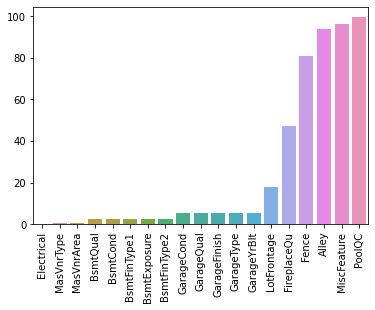

In [8]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

(0.0, 1.0)

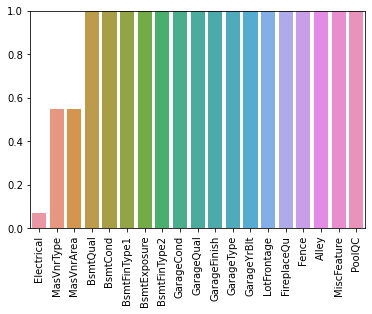

In [9]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

# Set 1% Threshold
plt.ylim(0,1)

In [10]:
percent_nan[percent_nan < 1]

Electrical    0.068493
MasVnrType    0.547945
MasVnrArea    0.547945
dtype: float64

In [11]:
df[df['MasVnrType'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
234,235,60,RL,NaN,7851,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,216500
529,530,20,RL,NaN,32668,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Alloca,200624
650,651,60,FV,65.0,8125,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,205950
936,937,20,RL,67.0,10083,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2009,WD,Normal,184900
973,974,20,FV,95.0,11639,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,New,Partial,182000
977,978,120,FV,35.0,4274,Pave,Pave,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2007,New,Partial,199900
1243,1244,20,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,New,Partial,465000
1278,1279,60,RL,75.0,9473,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2008,WD,Normal,237000


In [12]:
df[df['Electrical'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1379,1380,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


In [13]:
df[['Electrical','MasVnrType']] = df[['Electrical','MasVnrType']].fillna('None')
df[['MasVnrArea']] = df[['MasVnrArea']].fillna(0)

In [14]:
percent_nan = percent_missing(df)

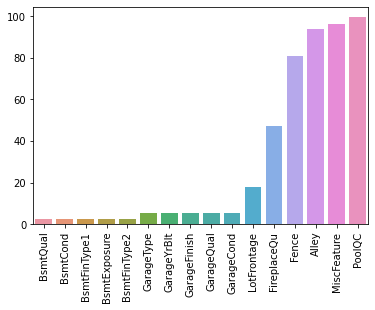

In [15]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

In [16]:
str_cols = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual','BsmtCond','BsmtFinType1','BsmtFinType2','BsmtExposure']
df[str_cols] = df[str_cols].fillna('None')

In [17]:
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)

In [18]:
percent_nan = percent_missing(df)

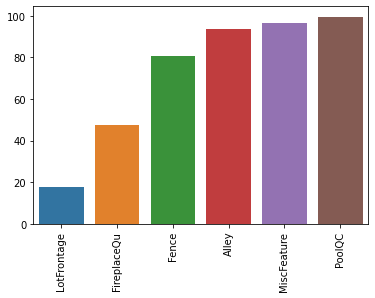

In [19]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

In [20]:
percent_nan.index

Index(['LotFrontage', 'FireplaceQu', 'Fence', 'Alley', 'MiscFeature',
       'PoolQC'],
      dtype='object')

In [21]:
df[['LotFrontage', 'FireplaceQu', 'Fence', 'Alley', 'MiscFeature',
       'PoolQC']]

,LotFrontage,FireplaceQu,Fence,Alley,MiscFeature,PoolQC
0,65.0,NaN,NaN,NaN,NaN,NaN
1,80.0,TA,NaN,NaN,NaN,NaN
2,68.0,TA,NaN,NaN,NaN,NaN
3,60.0,Gd,NaN,NaN,NaN,NaN
4,84.0,TA,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
1455,62.0,TA,NaN,NaN,NaN,NaN
1456,85.0,TA,MnPrv,NaN,NaN,NaN
1457,66.0,Gd,GdPrv,NaN,Shed,NaN
1458,68.0,NaN,NaN,NaN,NaN,NaN


In [22]:
df.drop(['Fence', 'Alley', 'MiscFeature',
       'PoolQC'], axis=1, inplace=True)

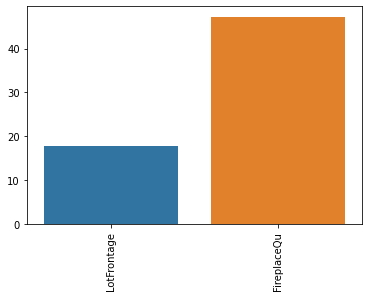

In [23]:
percent_nan = percent_missing(df)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

In [24]:
df['FireplaceQu'] = df['FireplaceQu'].fillna('None')

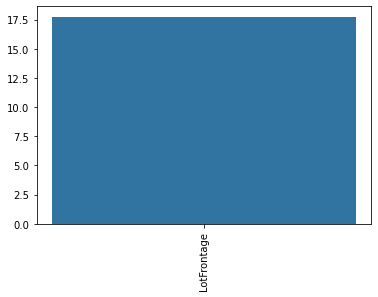

In [25]:
percent_nan = percent_missing(df)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

In [26]:
df['Neighborhood'].unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

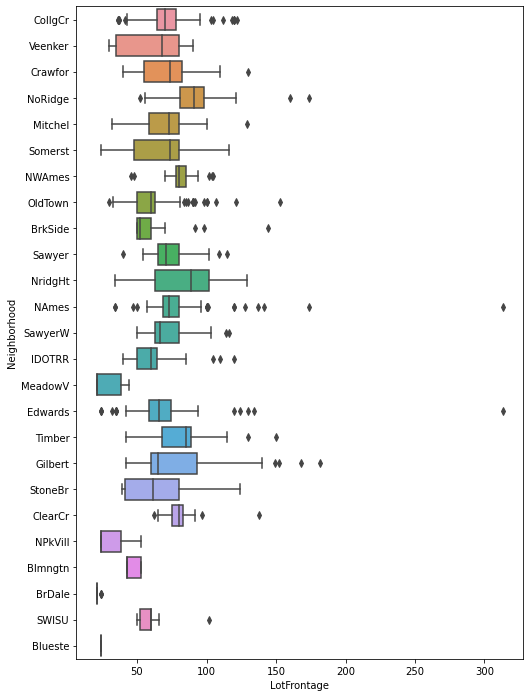

In [27]:
plt.figure(figsize=(8,12))
sns.boxplot(x='LotFrontage',y='Neighborhood',data=df,orient='h')

In [28]:
df[df['LotFrontage'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
7,8,60,RL,NaN,10382,Pave,IR1,Lvl,AllPub,Corner,...,228,0,0,0,350,11,2009,WD,Normal,200000
12,13,20,RL,NaN,12968,Pave,IR2,Lvl,AllPub,Inside,...,0,0,176,0,0,9,2008,WD,Normal,144000
14,15,20,RL,NaN,10920,Pave,IR1,Lvl,AllPub,Corner,...,176,0,0,0,0,5,2008,WD,Normal,157000
16,17,20,RL,NaN,11241,Pave,IR1,Lvl,AllPub,CulDSac,...,0,0,0,0,700,3,2010,WD,Normal,149000
24,25,20,RL,NaN,8246,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,5,2010,WD,Normal,154000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429,1430,20,RL,NaN,12546,Pave,IR1,Lvl,AllPub,Corner,...,99,0,0,0,0,4,2007,WD,Normal,182900
1431,1432,120,RL,NaN,4928,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,10,2009,WD,Normal,143750
1441,1442,120,RM,NaN,4426,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,5,2008,WD,Normal,149300
1443,1444,30,RL,NaN,8854,Pave,Reg,Lvl,AllPub,Inside,...,0,0,40,0,0,5,2009,WD,Normal,121000


In [29]:
df.groupby('Neighborhood')['LotFrontage'].mean()

Neighborhood
Blmngtn    47.142857
Blueste    24.000000
BrDale     21.562500
BrkSide    57.509804
ClearCr    83.461538
CollgCr    71.682540
Crawfor    71.804878
Edwards    68.217391
Gilbert    79.877551
IDOTRR     62.500000
MeadowV    27.800000
Mitchel    70.083333
NAmes      76.462366
NPkVill    32.285714
NWAmes     81.288889
NoRidge    91.878788
NridgHt    81.881579
OldTown    62.788991
SWISU      58.913043
Sawyer     74.437500
SawyerW    71.500000
Somerst    64.666667
StoneBr    62.700000
Timber     80.133333
Veenker    59.714286
Name: LotFrontage, dtype: float64

In [30]:
df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda val: val.fillna(val.mean()))

In [31]:
percent_nan = percent_missing(df)
percent_nan

Series([], dtype: float64)

In [32]:
df_nums = df.select_dtypes(exclude='object')
df_objs = df.select_dtypes(include='object')

In [33]:
df_objs = pd.get_dummies(df_objs,drop_first=True)

In [34]:
final_df = pd.concat([df_nums,df_objs],axis=1)

In [35]:
X = final_df.drop('SalePrice', axis=1)
y = final_df['SalePrice']

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [39]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [40]:
from sklearn.linear_model import ElasticNet
basic_elastic_model = ElasticNet(max_iter=1000000)
param_grid = { 'alpha': [100, 120, 130, 140, 200],
                'l1_ratio': [.1, .7, .99, 1] }

In [41]:
from sklearn.model_selection import GridSearchCV
grid_model = GridSearchCV(estimator=basic_elastic_model,
                          param_grid=param_grid,
                          scoring='neg_mean_squared_error',
                          cv=5,
                          verbose=1)

In [42]:
grid_model.fit(scaled_X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.3s finished


GridSearchCV(cv=5, estimator=ElasticNet(max_iter=1000000),
             param_grid={'alpha': [100, 120, 130, 140, 200],
                         'l1_ratio': [0.1, 0.7, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=1)

In [43]:
grid_model.best_params_

{'alpha': 100, 'l1_ratio': 0.99}

In [44]:
y_pred = grid_model.predict(scaled_X_test)

In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred))

40374.21265964587

In [46]:
res_df = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

In [47]:
res_df[['Electrical','MasVnrType']] = res_df[['Electrical','MasVnrType']].fillna('None')
res_df[['MasVnrArea']] = res_df[['MasVnrArea']].fillna(0)

str_cols = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual','BsmtCond','BsmtFinType1','BsmtFinType2','BsmtExposure']
res_df[str_cols] = res_df[str_cols].fillna('None')

res_df['GarageYrBlt'] = res_df['GarageYrBlt'].fillna(0)

num_cols = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageCars', 'GarageArea']
res_df[num_cols] = res_df[num_cols].fillna(0)

res_df.drop(['Fence', 'Alley', 'MiscFeature','PoolQC'], axis=1, inplace=True)
res_df['FireplaceQu'] = res_df['FireplaceQu'].fillna('None')

res_df['LotFrontage'] = res_df.groupby('Neighborhood')['LotFrontage'].transform(lambda val: val.fillna(val.mean()))

In [48]:
res_df_nums = res_df.select_dtypes(exclude='object')
res_df_objs = res_df.select_dtypes(include='object')
res_df_objs = pd.get_dummies(res_df_objs,drop_first=True)
res_final_df = pd.concat([res_df_nums,res_df_objs],axis=1)

In [49]:
res_final_df = res_final_df.reindex(columns = final_df.columns, fill_value=0)
res_final_df.drop('SalePrice', axis=1, inplace=True)

In [50]:
final_pred_ = grid_model.predict(res_final_df)

In [51]:
res_final_df['SalePrice'] = final_pred_

In [52]:
pred_results = res_final_df[['Id', 'SalePrice']]
pred_results = pred_results.set_index('Id')
pred_results.to_csv('/kaggle/working/submission.csv')